<a href="https://colab.research.google.com/github/sanjay1618/-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Classification_ch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame= False)
print(mnist)

In [8]:
X, y = mnist.data, mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


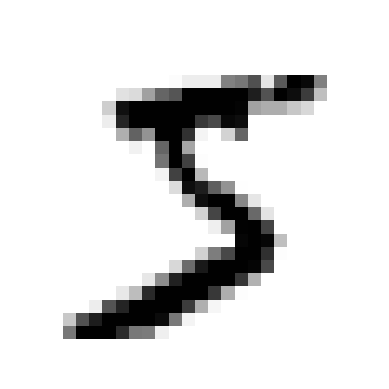

In [13]:
import matplotlib.pyplot as plt
# Viewing the single digit.
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap = "binary")
  plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)

In [15]:
#Splitting the dataset into training sets and testing sets
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

In [16]:
#only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and non-5.
# First we’ll create the target vectors for this classification task:
y_train_5 = (y_train == '5') #True for all 5's and false for other digits.
y_test_5 = (y_test == '5') # True for all 5's and false for other digits

# We will be using the stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict([some_digit])

array([ True])

In [31]:
# We will apply the cross validation using the cross_val_score()  to do the 3-fold cross validation on the X_train and y_train
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.962 , 0.956 , 0.9665])

In [35]:
#Implementing the StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits = 3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  clone_clf = clone(sgd_clf)
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.962
0.956
0.9665
